In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime

In [2]:
# Build URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

576

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1# Run an API request for each of the cities.
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
# Run an API request for each of the cities.
try:
    # Parse the JSON and retrieve data.
    city_weather = requests.get(city_url).json()
    # Parse out the needed data.
    city_lat = city_weather["coord"]["lat"]
    city_lng = city_weather["coord"]["lon"]
    city_max_temp = city_weather["main"]["temp_max"]
    city_humidity = city_weather["main"]["humidity"]
    city_clouds = city_weather["clouds"]["all"]
    city_wind = city_weather["wind"]["speed"]
    city_country = city_weather["sys"]["country"]
    # Convert the date to ISO standard.
    city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
    # Append the city information into city_data list.
    city_data.append({"City": city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

# If an error is experienced, skip the city.
except:
    print("City not found. Skipping...")
    pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | ribeira grande
Processing Record 2 of Set 12 | tootsi
Processing Record 3 of Set 12 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 12 | upernavik
Processing Record 5 of Set 12 | nome
Processing Record 6 of Set 12 | sayansk
Processing Record 7 of Set 12 | puerto ayora
Processing Record 8 of Set 12 | georgetown
Processing Record 9 of Set 12 | nouadhibou
Processing Record 10 of Set 12 | saint-philippe
Processing Record 11 of Set 12 | jamestown
Processing Record 12 of Set 12 | neustadt
Processing Record 13 of Set 12 | srednekolymsk
Processing Record 14 of Set 12 | general roca
Processing Record 15 of Set 12 | khorixas
Processing Record 16 of Set 12 | kapaa
Processing Record 17 of Set 12 | doka
Processing Record 18 of Set 12 | yellowknife
Processing Record 19 of Set 12 | hobart
Processing Record 20 of Set 12 | beinamar
Processing Record 21 of Set 12 | cape town
Processing Reco

Processing Record 33 of Set 15 | torbay
Processing Record 34 of Set 15 | menongue
Processing Record 35 of Set 15 | opuwo
Processing Record 36 of Set 15 | mutoko
Processing Record 37 of Set 15 | sao joao da barra
Processing Record 38 of Set 15 | la ronge
Processing Record 39 of Set 15 | jalor
Processing Record 40 of Set 15 | almansa
Processing Record 41 of Set 15 | ambilobe
Processing Record 42 of Set 15 | cockburn harbour
City not found. Skipping...
Processing Record 43 of Set 15 | feijo
Processing Record 44 of Set 15 | padang
Processing Record 45 of Set 15 | sinnamary
Processing Record 46 of Set 15 | gigmoto
Processing Record 47 of Set 15 | saint-louis
Processing Record 48 of Set 15 | klaksvik
Processing Record 49 of Set 15 | bargal
City not found. Skipping...
Processing Record 50 of Set 15 | zafarwal
Processing Record 1 of Set 16 | aklavik
Processing Record 2 of Set 16 | jalu
Processing Record 3 of Set 16 | acapulco
Processing Record 4 of Set 16 | saskylakh
Processing Record 5 of Set

Processing Record 20 of Set 19 | dzhusaly
City not found. Skipping...
Processing Record 21 of Set 19 | henties bay
Processing Record 22 of Set 19 | khonuu
City not found. Skipping...
Processing Record 23 of Set 19 | baykit
Processing Record 24 of Set 19 | peace river
Processing Record 25 of Set 19 | mattru
Processing Record 26 of Set 19 | port-gentil
Processing Record 27 of Set 19 | mackay
Processing Record 28 of Set 19 | pangnirtung
Processing Record 29 of Set 19 | malinovskiy
Processing Record 30 of Set 19 | provideniya
Processing Record 31 of Set 19 | malwan
City not found. Skipping...
Processing Record 32 of Set 19 | san luis
Processing Record 33 of Set 19 | waipawa
Processing Record 34 of Set 19 | uvira
Processing Record 35 of Set 19 | samusu
City not found. Skipping...
Processing Record 36 of Set 19 | nigde
Processing Record 37 of Set 19 | mata
Processing Record 38 of Set 19 | zavetnoye
Processing Record 39 of Set 19 | goderich
Processing Record 40 of Set 19 | kemijarvi
Processin

City not found. Skipping...
Processing Record 7 of Set 23 | nokaneng
Processing Record 8 of Set 23 | nara
Processing Record 9 of Set 23 | mantua
Processing Record 10 of Set 23 | cam pha
City not found. Skipping...
Processing Record 11 of Set 23 | chengde
Processing Record 12 of Set 23 | naryan-mar
Processing Record 13 of Set 23 | lucapa
Processing Record 14 of Set 23 | itoman
Processing Record 15 of Set 23 | gornopravdinsk
Processing Record 16 of Set 23 | iqaluit
Processing Record 17 of Set 23 | bourail
Processing Record 18 of Set 23 | blagoveshchenka
Processing Record 19 of Set 23 | umm lajj
Processing Record 20 of Set 23 | pueblo nuevo
Processing Record 21 of Set 23 | dong hoi
Processing Record 22 of Set 23 | noumea
Processing Record 23 of Set 23 | vila
Processing Record 24 of Set 23 | hervey bay
Processing Record 25 of Set 23 | buchanan
Processing Record 26 of Set 23 | awbari
-----------------------------
Data Retrieval Complete      
-----------------------------
------------------

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,63.00,67,40,11.50,PT,2022-02-05 15:16:52
1,Tootsi,58.5781,24.7925,33.66,93,100,7.81,EE,2022-02-05 15:16:52
2,Upernavik,72.7868,-56.1549,1.26,95,100,4.56,GL,2022-02-05 15:16:53
3,Nome,64.5011,-165.4064,-2.13,50,0,4.61,US,2022-02-05 15:16:53
4,Sayansk,54.1088,102.1648,14.41,93,100,4.32,RU,2022-02-05 15:16:53
5,Puerto Ayora,-0.7393,-90.3518,80.56,92,46,4.00,EC,2022-02-05 15:16:54
6,Georgetown,5.4112,100.3354,81.90,80,40,2.30,MY,2022-02-05 15:16:54
7,Nouadhibou,20.9310,-17.0347,75.18,64,0,13.80,MR,2022-02-05 15:16:54
8,Saint-Philippe,-21.3585,55.7679,81.99,85,100,19.55,RE,2022-02-05 15:16:55
9,Jamestown,42.0970,-79.2353,16.30,64,100,7.00,US,2022-02-05 15:16:55


# 6.3 - Plotting data

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

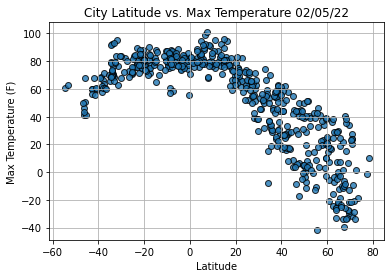

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

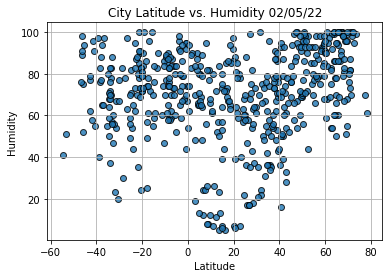

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

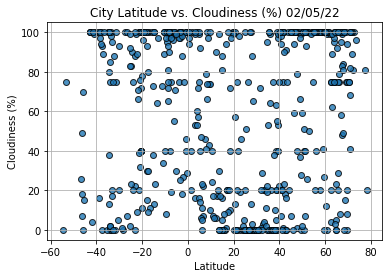

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

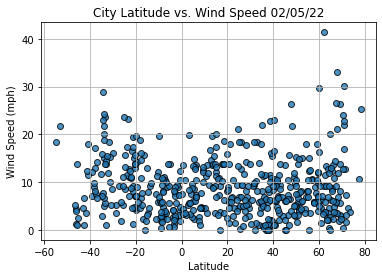

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                     Khorixas
Lat                      -20.3667
Lng                       14.9667
Max Temp                    82.33
Humidity                       24
Cloudiness                     72
Wind Speed                  12.97
Country                        NA
Date          2022-02-05 15:16:57
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4       True
       ...  
526     True
527    False
528     True
529     True
530     True
Name: Lat, Length: 531, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,63.00,67,40,11.50,PT,2022-02-05 15:16:52
1,Tootsi,58.5781,24.7925,33.66,93,100,7.81,EE,2022-02-05 15:16:52
2,Upernavik,72.7868,-56.1549,1.26,95,100,4.56,GL,2022-02-05 15:16:53
3,Nome,64.5011,-165.4064,-2.13,50,0,4.61,US,2022-02-05 15:16:53
4,Sayansk,54.1088,102.1648,14.41,93,100,4.32,RU,2022-02-05 15:16:53
6,Georgetown,5.4112,100.3354,81.90,80,40,2.30,MY,2022-02-05 15:16:54
7,Nouadhibou,20.9310,-17.0347,75.18,64,0,13.80,MR,2022-02-05 15:16:54
9,Jamestown,42.0970,-79.2353,16.30,64,100,7.00,US,2022-02-05 15:16:55
10,Neustadt,49.7117,12.0872,39.29,69,100,3.00,DE,2022-02-05 15:16:55
11,Srednekolymsk,67.4500,153.6833,-39.33,100,48,3.53,RU,2022-02-05 15:16:56


In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,63.00,67,40,11.50,PT,2022-02-05 15:16:52
1,Tootsi,58.5781,24.7925,33.66,93,100,7.81,EE,2022-02-05 15:16:52
2,Upernavik,72.7868,-56.1549,1.26,95,100,4.56,GL,2022-02-05 15:16:53
3,Nome,64.5011,-165.4064,-2.13,50,0,4.61,US,2022-02-05 15:16:53
4,Sayansk,54.1088,102.1648,14.41,93,100,4.32,RU,2022-02-05 15:16:53


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

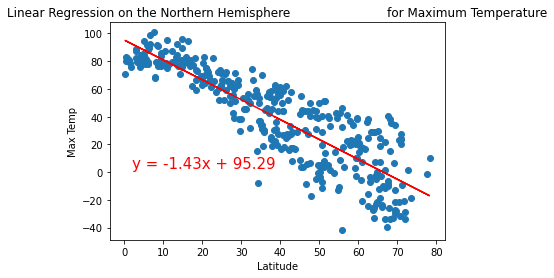

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(2,3))

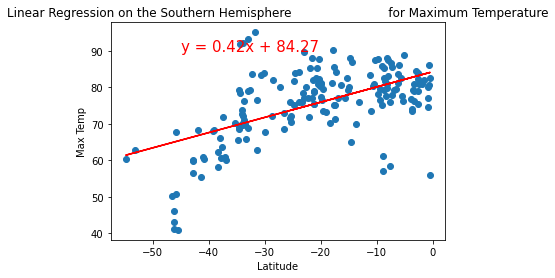

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-45,90))

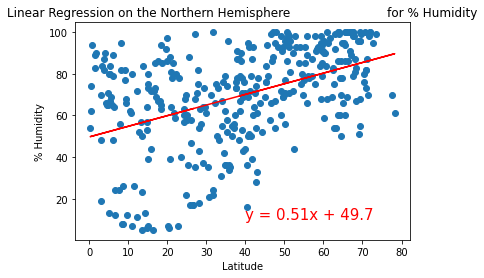

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

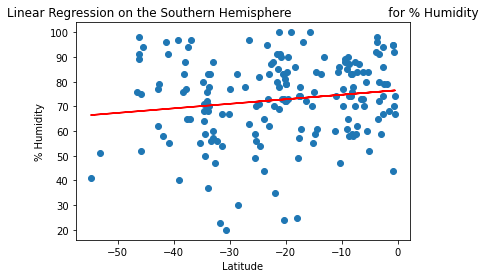

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

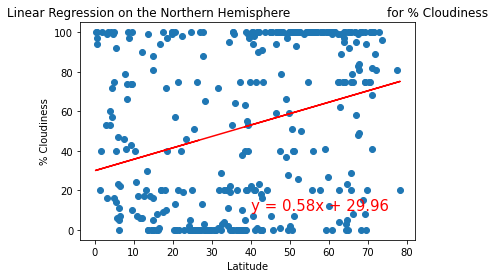

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

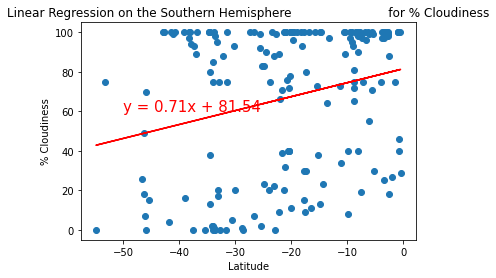

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

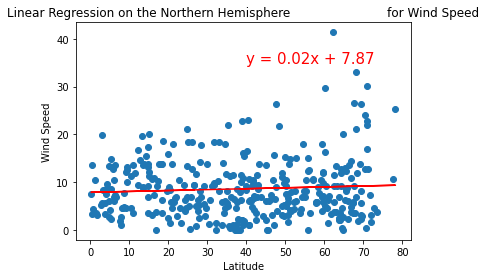

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

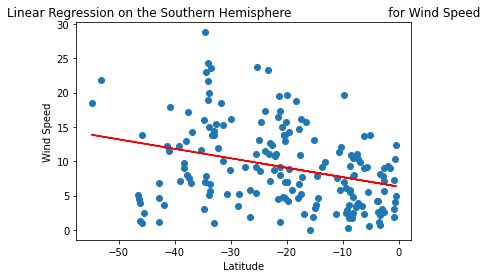

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))